In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib 
%config InlineBackend.figure_format = 'retina'
import random
import os
import seaborn as sns
matplotlib.rcParams['figure.figsize'] = (8.09016994375, 5.0)
matplotlib.rcParams['xtick.labelsize'] = 20.0
matplotlib.rcParams['ytick.labelsize'] = 20.0
matplotlib.rcParams['axes.labelsize'] = 25.0
matplotlib.rcParams['legend.fontsize'] = 16.0
matplotlib.rcParams['font.family']= 'Times New Roman'
matplotlib.rcParams['font.sans-serif']= ['Bitstream Vera Sans']
matplotlib.rcParams['text.usetex']= True
matplotlib.rcParams['mathtext.fontset']= 'stixsans'

## Definitions

In [2]:
def lambdatilde(lambda1,lambda2,m1,m2):
    mtotal = m1+m2
    m1fac=m1+12*m2
    m2fac=m2+12*m1
    return 16./13*(m1fac*m1**(4)*lambda1+m2fac*m2**(4)*lambda2)/mtotal**(5)

def F_n(q,n):
    return (1-q**(10/(3-n)))/(1+q**(10/(3-n)))
    #return (1 - np.power(q, 10./(3-n)))/(1 + np.power(q, 10./(3-n)))

a=0.100784
b11= -2.97568
b12=1.11361
b21= 13.8791
b22= -4.21877
b31= -20.805
b32=18.0038
c11= -2.72449
c12=0.778517

c21=10.5153
c22= 0.907055
c31= -9.6157
c32=-2.04165

a_err=0.0301849
b11_err=0.597947
b12_err=0.435205
b21_err=1.51432
b22_err=2.61011
b31_err=0.738146
b32_err=0.798597
c11_err=0.535106
c12_err=0.528731
c21_err=0.834321
c22_err=4.86418
c31_err=4.00367
c32_err=8.992

# a=0.0755
# b11= -2.235
# b12=0.8474
# b21= 10.45
# b22= -3.251
# b31= -15.70
# b32=13.61
# c11= -2.048
# c12=0.5976

# c21=7.941
# c22= 0.5658
# c31= -7.360
# c32= -1.320

def binary_love(q_v,lambdas_v,n_v):
    num = a+b11*q_v*lambdas_v**(-1./5)+b12*q_v*q_v*lambdas_v**(-1./5)+b21*q_v*lambdas_v**(-2./5)\
    +b22*q_v*q_v*lambdas_v**(-2./5)+b31*q_v*lambdas_v**(-3./5)+b32*q_v*q_v*lambdas_v**(-3./5)
    den = a+c11*q_v*lambdas_v**(-1./5)+c12*q_v*q_v*lambdas_v**(-1./5)+c21*q_v*lambdas_v**(-2./5)\
    +c22*q_v*q_v*lambdas_v**(-2./5)+c31*q_v*lambdas_v**(-3./5)+c32*q_v*q_v*lambdas_v**(-3./5)
    
    return F_n(q_v,n_v)*lambdas_v*num/den

def binary_love_unc(q_v,lambdas_v,n_v,b):
    num = b[0]+b[1]*q_v*lambdas_v**(-1./5)+b[2]*q_v*q_v*lambdas_v**(-1./5)+b[3]*q_v*lambdas_v**(-2./5)\
    +b[4]*q_v*q_v*lambdas_v**(-2./5)+b[5]*q_v*lambdas_v**(-3./5)+b[6]*q_v*q_v*lambdas_v**(-3./5)
    den = b[0]+b[7]*q_v*lambdas_v**(-1./5)+b[8]*q_v*q_v*lambdas_v**(-1./5)+b[9]*q_v*lambdas_v**(-2./5)\
    +b[10]*q_v*q_v*lambdas_v**(-2./5)+b[11]*q_v*lambdas_v**(-3./5)+b[12]*q_v*q_v*lambdas_v**(-3./5)
    
    return F_n(q_v,n_v)*lambdas_v*num/den

## Suggestions for Fig.1 in the paper (representations of the relation)


In [3]:
def FitFucLambdasmean(x):
    return 137.12527389/x/x-32.80266127/x+0.51686373

def FitFucLambdasstd(x):
    return -7.38541865e-05*x*np.sqrt(x)+1.03777889e-02*x+4.58171653e-01*np.sqrt(x)-8.34191255e-01

def FitFucqstd(x):
    return -201.43239619*x*x+273.92682761*x-71.23422462

def FitFucqmean(x):
    return -11.27652805*x*x+14.94995435*x-4.66388505

# Fits for the mean and stdev of the residual gaussian

## Let's start with the relative error

In [76]:
# Parameter order: q, lambda_s, lambda_a, residual, relative residual
ResidualsC=np.genfromtxt("UniversalRelationsResidualsConstrained.dat")
ResidualsUnC=np.genfromtxt("UniversalRelationsResidualsUnConstrained.dat")
ResidualsP=np.genfromtxt("UniversalRelationsResidualsPosterior.dat")

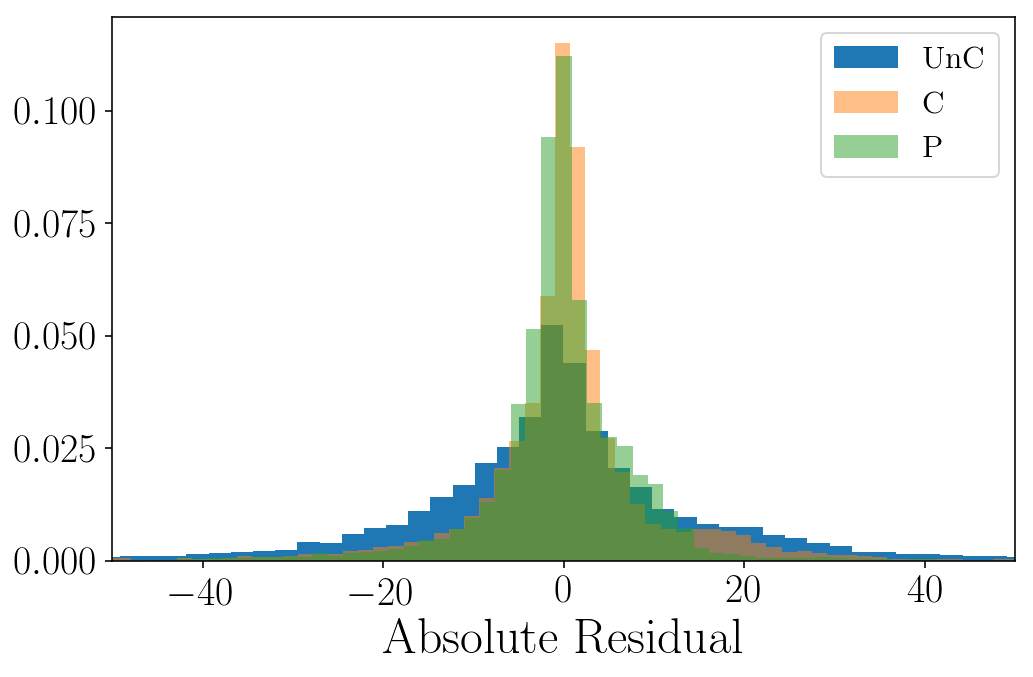

In [77]:
plt.hist(ResidualsUnC[:,3],bins=100,label='UnC',normed=True)
plt.hist(ResidualsC[:,3],bins=100,label='C',alpha=0.5,normed=True)
plt.hist(ResidualsP[:,3],bins=100,label='P',alpha=0.5,normed=True)
plt.legend()
plt.xlim(-50,50)
plt.xlabel('Absolute Residual')
plt.show()

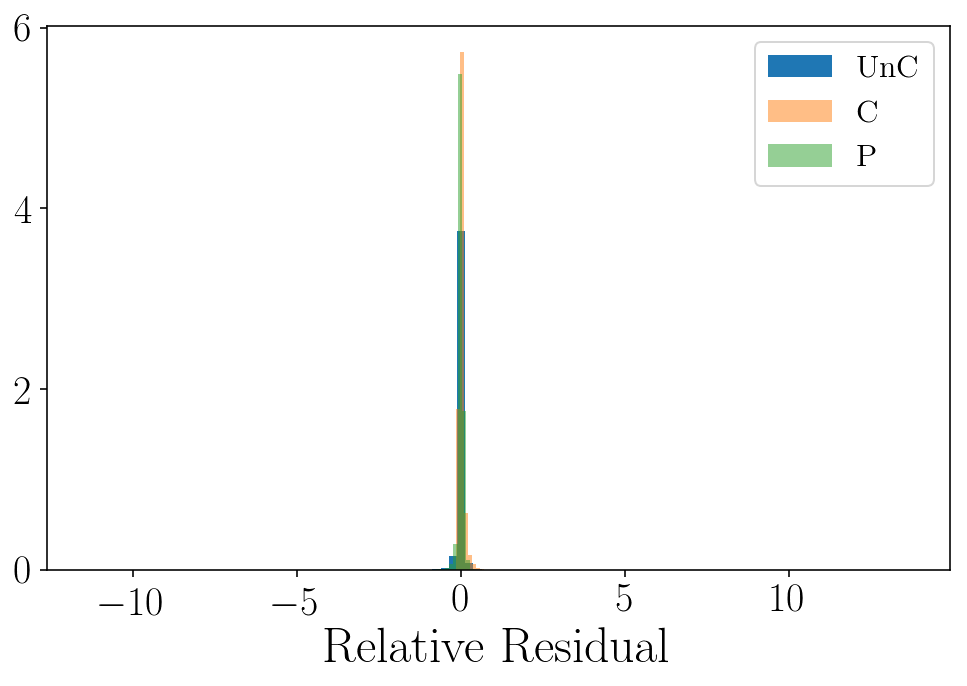

In [78]:
plt.hist(ResidualsUnC[:,4],bins=100,label='UnC',normed=True)
plt.hist(ResidualsC[:,4],bins=100,label='C',alpha=0.5,normed=True)
plt.hist(ResidualsP[:,4],bins=100,label='P',alpha=0.5,normed=True)
plt.legend()
#plt.xlim(-50,50)
plt.xlabel('Relative Residual')
plt.show()

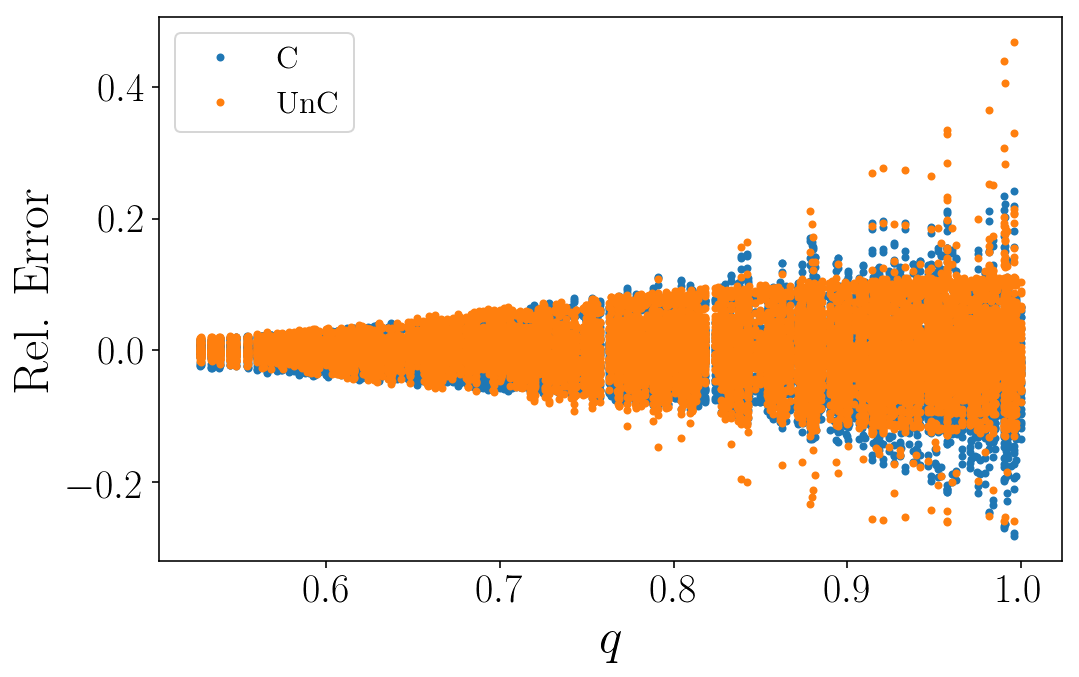

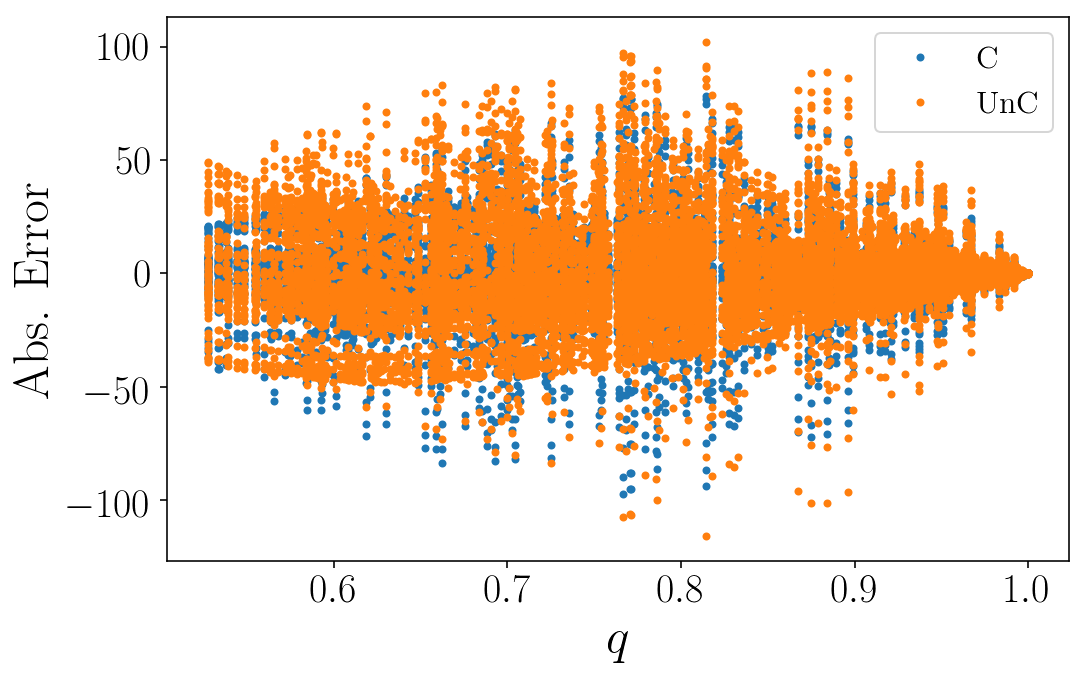

In [26]:
plt.plot(ResidualsC[:,0][np.fabs(ResidualsC[:,4])<1],ResidualsC[:,4][np.fabs(ResidualsC[:,4])<1],'.',label='C')
plt.plot(ResidualsUnC[:,0][np.fabs(ResidualsUnC[:,4])<1],ResidualsUnC[:,4][np.fabs(ResidualsUnC[:,4])<1],'.',label='UnC')
plt.xlabel('$q$')
plt.ylabel('Rel. Error')
plt.legend()
plt.show()

plt.plot(ResidualsC[:,0],ResidualsC[:,3],'.',label='C')
plt.plot(ResidualsUnC[:,0],ResidualsUnC[:,3],'.',label='UnC')
plt.xlabel('$q$')
plt.ylabel('Abs. Error')
plt.legend()
plt.show()

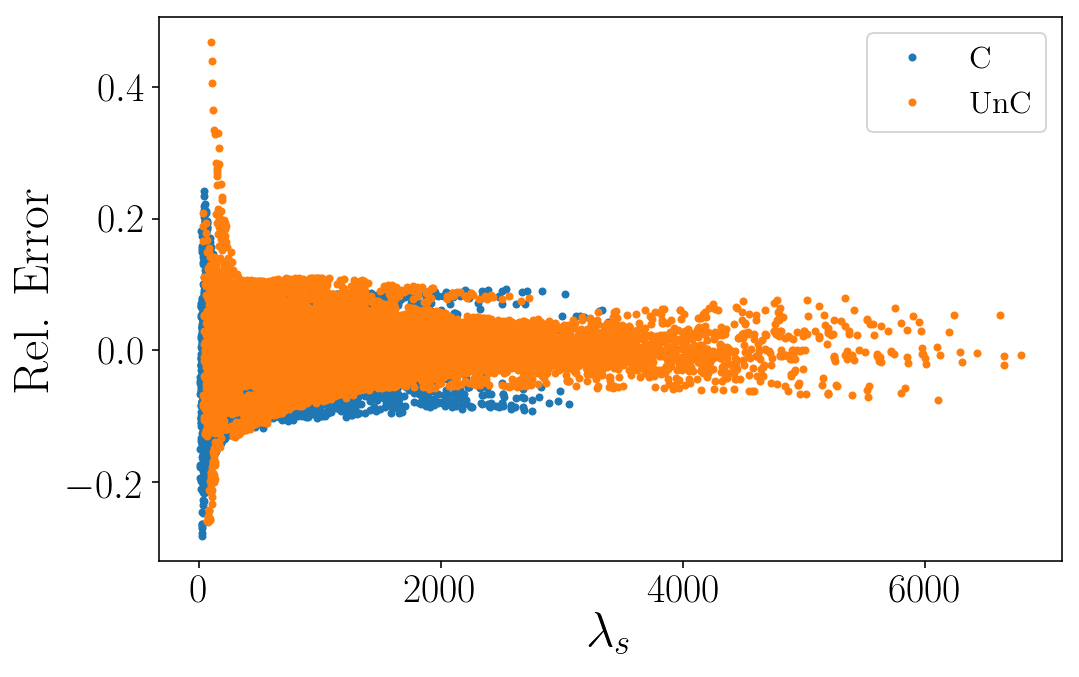

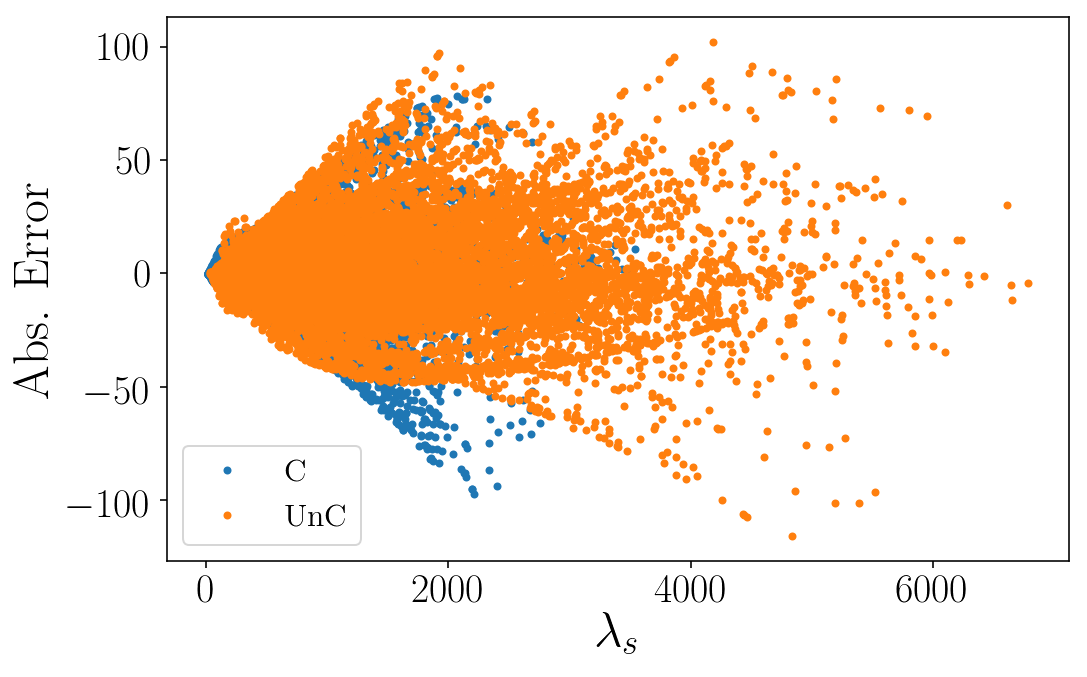

In [27]:
plt.plot(ResidualsC[:,1][np.fabs(ResidualsC[:,4])<1],ResidualsC[:,4][np.fabs(ResidualsC[:,4])<1],'.',label='C')
plt.plot(ResidualsUnC[:,1][np.fabs(ResidualsUnC[:,4])<1],ResidualsUnC[:,4][np.fabs(ResidualsUnC[:,4])<1],'.',label='UnC')
plt.xlabel('$\lambda_s$')
plt.ylabel('Rel. Error')
plt.legend()
plt.show()


plt.plot(ResidualsC[:,1],ResidualsC[:,3],'.',label='C')
plt.plot(ResidualsUnC[:,1],ResidualsUnC[:,3],'.',label='UnC')
plt.xlabel('$\lambda_s$')
plt.ylabel('Abs. Error')
plt.legend()
plt.show()

In [55]:
ResidualsUnC

array([[ 9.15891807e-01,  2.06911818e+02,  6.10155119e+01,
         2.93313661e+00,  4.80719823e-02],
       [ 7.87219086e-01,  1.24651329e+03,  7.64708199e+02,
         6.64860994e+01,  8.69430973e-02],
       [ 7.32425497e-01,  1.07624976e+03,  7.98793195e+02,
         5.57607314e+01,  6.98062173e-02],
       ...,
       [ 5.93366924e-01,  3.48201578e+03,  2.98279288e+03,
        -3.27855127e+01, -1.09915485e-02],
       [ 7.95465117e-01,  2.90447787e+03,  1.46547766e+03,
        -3.13460716e+01, -2.13896619e-02],
       [ 6.06126971e-01,  2.03677976e+03,  1.72583863e+03,
        -4.66723778e+01, -2.70433034e-02]])

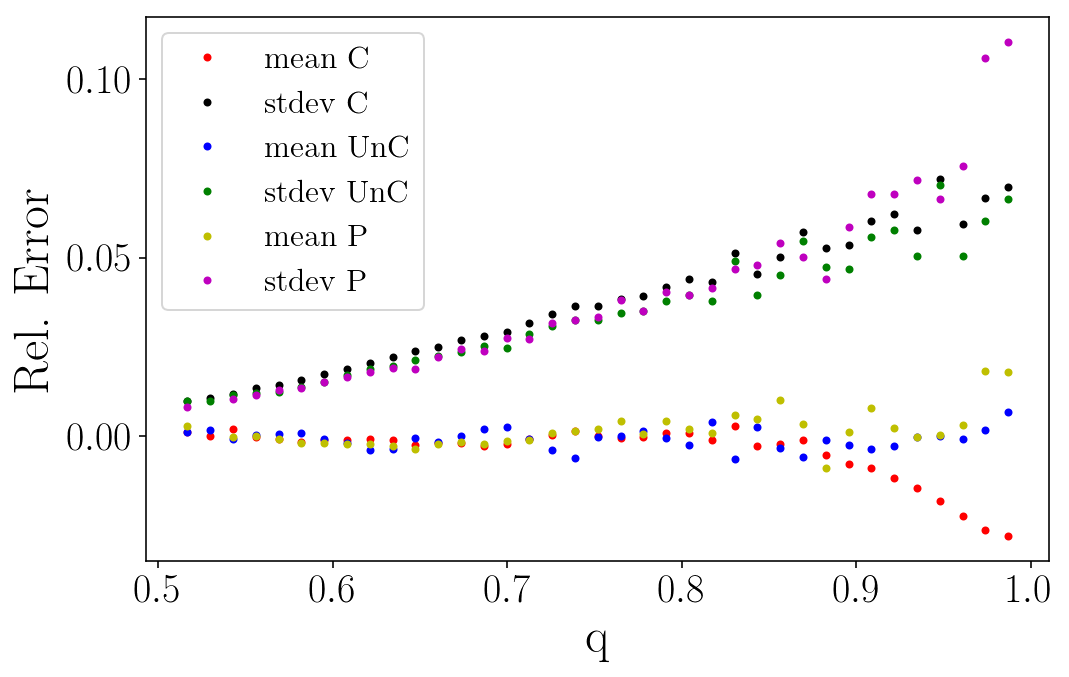

In [64]:
qbin=np.linspace(0.36,1,50)
Resqbin={}
Resqbinmean=[]
Resqbinstd=[]
#ResidualsC1000=ResidualsC[ResidualsC[:,1]<1000]
ResidualsC1000=ResidualsC
for i in xrange(len(qbin)-1):
    Reslelt=ResidualsC1000[:,4][ResidualsC1000[:,0]>qbin[i]]
    qleft=ResidualsC1000[:,0][ResidualsC1000[:,0]>qbin[i]]
    Reslelt=Reslelt[qleft<qbin[i+1]]
    Reslelt=Reslelt[np.fabs(Reslelt)<0.5]
    Resqbin[i]= Reslelt
    Resqbinmean.append(np.mean(Resqbin[i]))
    Resqbinstd.append(np.std(Resqbin[i]))
plt.plot(qbin[:-1], Resqbinmean,'.',color='r',label='mean C')
plt.plot(qbin[:-1], Resqbinstd,'.',color='k',label='stdev C')

Resqbin={}
Resqbinmean=[]
Resqbinstd=[]
#ResidualsUnC1000=ResidualsUnC[ResidualsUnC[:,1]<1000]
ResidualsUnC1000=ResidualsUnC
for i in xrange(len(qbin)-1):
    Reslelt=ResidualsUnC1000[:,4][ResidualsUnC1000[:,0]>qbin[i]]
    qleft=ResidualsUnC1000[:,0][ResidualsUnC1000[:,0]>qbin[i]]
    Reslelt=Reslelt[qleft<qbin[i+1]]
    Reslelt=Reslelt[np.fabs(Reslelt)<0.5]
    Resqbin[i]= Reslelt
    Resqbinmean.append(np.mean(Resqbin[i]))
    Resqbinstd.append(np.std(Resqbin[i]))
plt.plot(qbin[:-1], Resqbinmean,'.',color='b',label='mean UnC')
plt.plot(qbin[:-1], Resqbinstd,'.',color='g',label='stdev UnC')

Resqbin={}
Resqbinmean=[]
Resqbinstd=[]
#ResidualsP1000=ResidualsP[ResidualsP[:,1]<1000]
ResidualsP1000=ResidualsP
for i in xrange(len(qbin)-1):
    Reslelt=ResidualsP1000[:,4][ResidualsP1000[:,0]>qbin[i]]
    qleft=ResidualsP1000[:,0][ResidualsP1000[:,0]>qbin[i]]
    Reslelt=Reslelt[qleft<qbin[i+1]]
    Reslelt=Reslelt[np.fabs(Reslelt)<0.5]
    Resqbin[i]= Reslelt
    Resqbinmean.append(np.mean(Resqbin[i]))
    Resqbinstd.append(np.std(Resqbin[i]))
plt.plot(qbin[:-1], Resqbinmean,'.',color='y',label='mean P')
plt.plot(qbin[:-1], Resqbinstd,'.',color='m',label='stdev P')


plt.xlabel('q')
plt.ylabel('Rel. Error')
plt.legend()
plt.show()

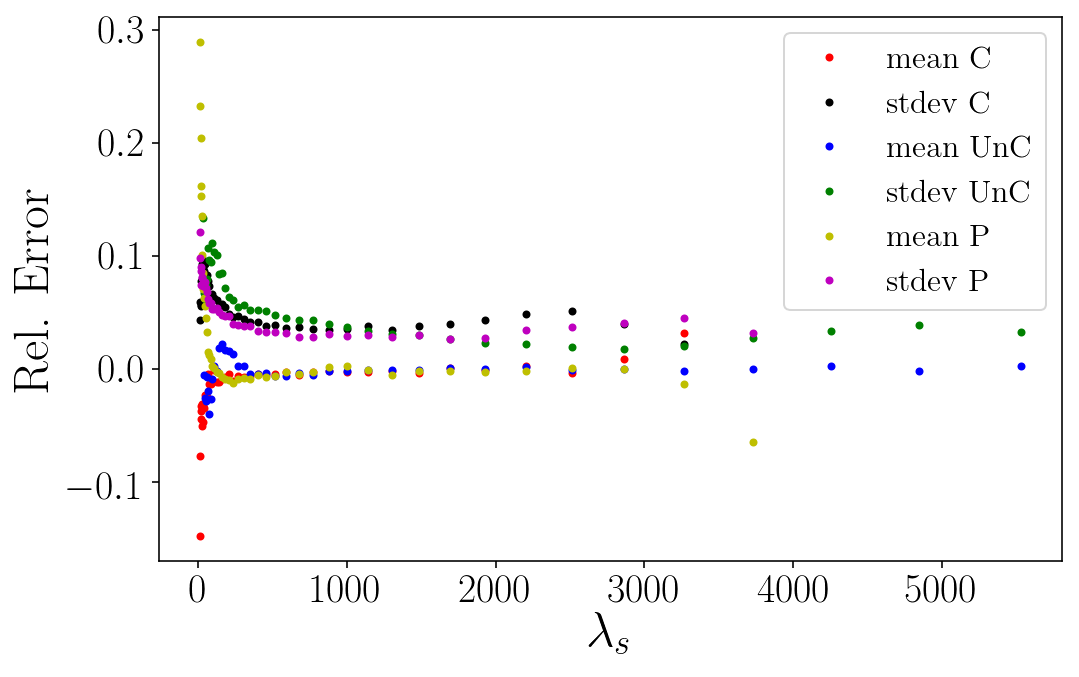

In [65]:
lambdasbin=np.logspace(1,3.8,50)
Reslambdasbin={}
Reslambdasbinmean=[]
Reslambdasbinstd=[]
for i in xrange(len(lambdasbin)-1):
    Reslelt=ResidualsC[:,4][ResidualsC[:,1]>lambdasbin[i]]
    lambdasleft=ResidualsC[:,1][ResidualsC[:,1]>lambdasbin[i]]
    Reslelt=Reslelt[lambdasleft<lambdasbin[i+1]]
    Reslelt=Reslelt[np.fabs(Reslelt)<0.5]
    Reslambdasbin[i]= Reslelt
    Reslambdasbinmean.append(np.mean(Reslambdasbin[i]))
    Reslambdasbinstd.append(np.std(Reslambdasbin[i]))
plt.plot(lambdasbin[:-1], Reslambdasbinmean,'.',color='r',label='mean C')
plt.plot(lambdasbin[:-1], Reslambdasbinstd,'.',color='k',label='stdev C')

Reslambdasbin={}
Reslambdasbinmean=[]
Reslambdasbinstd=[]
for i in xrange(len(lambdasbin)-1):
    Reslelt=ResidualsUnC[:,4][ResidualsUnC[:,1]>lambdasbin[i]]
    lambdasleft=ResidualsUnC[:,1][ResidualsUnC[:,1]>lambdasbin[i]]
    Reslelt=Reslelt[lambdasleft<lambdasbin[i+1]]
    Reslelt=Reslelt[np.fabs(Reslelt)<0.5]
    Reslambdasbin[i]= Reslelt
    Reslambdasbinmean.append(np.mean(Reslambdasbin[i]))
    Reslambdasbinstd.append(np.std(Reslambdasbin[i]))
plt.plot(lambdasbin[:-1], Reslambdasbinmean,'.',color='b',label='mean UnC')
plt.plot(lambdasbin[:-1], Reslambdasbinstd,'.',color='g',label='stdev UnC')

Reslambdasbin={}
Reslambdasbinmean=[]
Reslambdasbinstd=[]
for i in xrange(len(lambdasbin)-1):
    Reslelt=ResidualsP[:,4][ResidualsP[:,1]>lambdasbin[i]]
    lambdasleft=ResidualsP[:,1][ResidualsP[:,1]>lambdasbin[i]]
    Reslelt=Reslelt[lambdasleft<lambdasbin[i+1]]
    Reslelt=Reslelt[np.fabs(Reslelt)<0.5]
    Reslambdasbin[i]= Reslelt
    Reslambdasbinmean.append(np.mean(Reslambdasbin[i]))
    Reslambdasbinstd.append(np.std(Reslambdasbin[i]))
plt.plot(lambdasbin[:-1], Reslambdasbinmean,'.',color='y',label='mean P')
plt.plot(lambdasbin[:-1], Reslambdasbinstd,'.',color='m',label='stdev P')

plt.xlabel('$\lambda_s$')
plt.ylabel('Rel. Error')
plt.legend()
plt.show()

In [31]:
from scipy.optimize import curve_fit

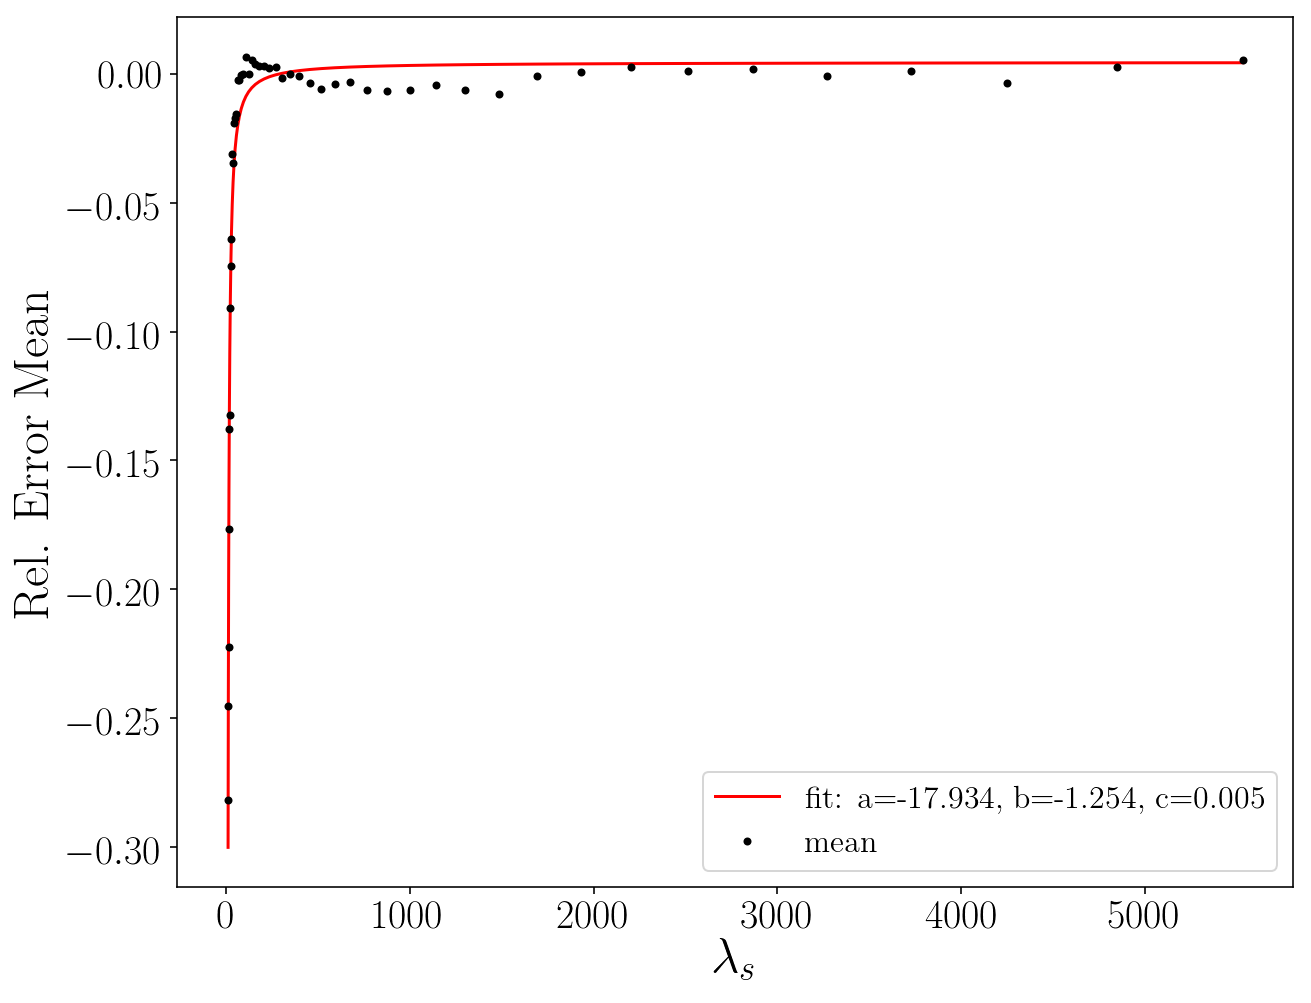

In [82]:
def FitFunc(x, a, b,c):
    return a/x/x+b/x+c
popt, pcov = curve_fit(FitFunc, lambdasbin[:-1], Reslambdasbinmean[:])
plt.plot(lambdasbin[:-1], FitFunc(lambdasbin[:-1], *popt), 'r-',label='fit: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(popt))
plt.plot(lambdasbin[:-1], Reslambdasbinmean,'.',color='k',label='mean')
plt.legend()
plt.xlabel('$\lambda_s$')
plt.ylabel('Rel. Error Mean')
plt.show()

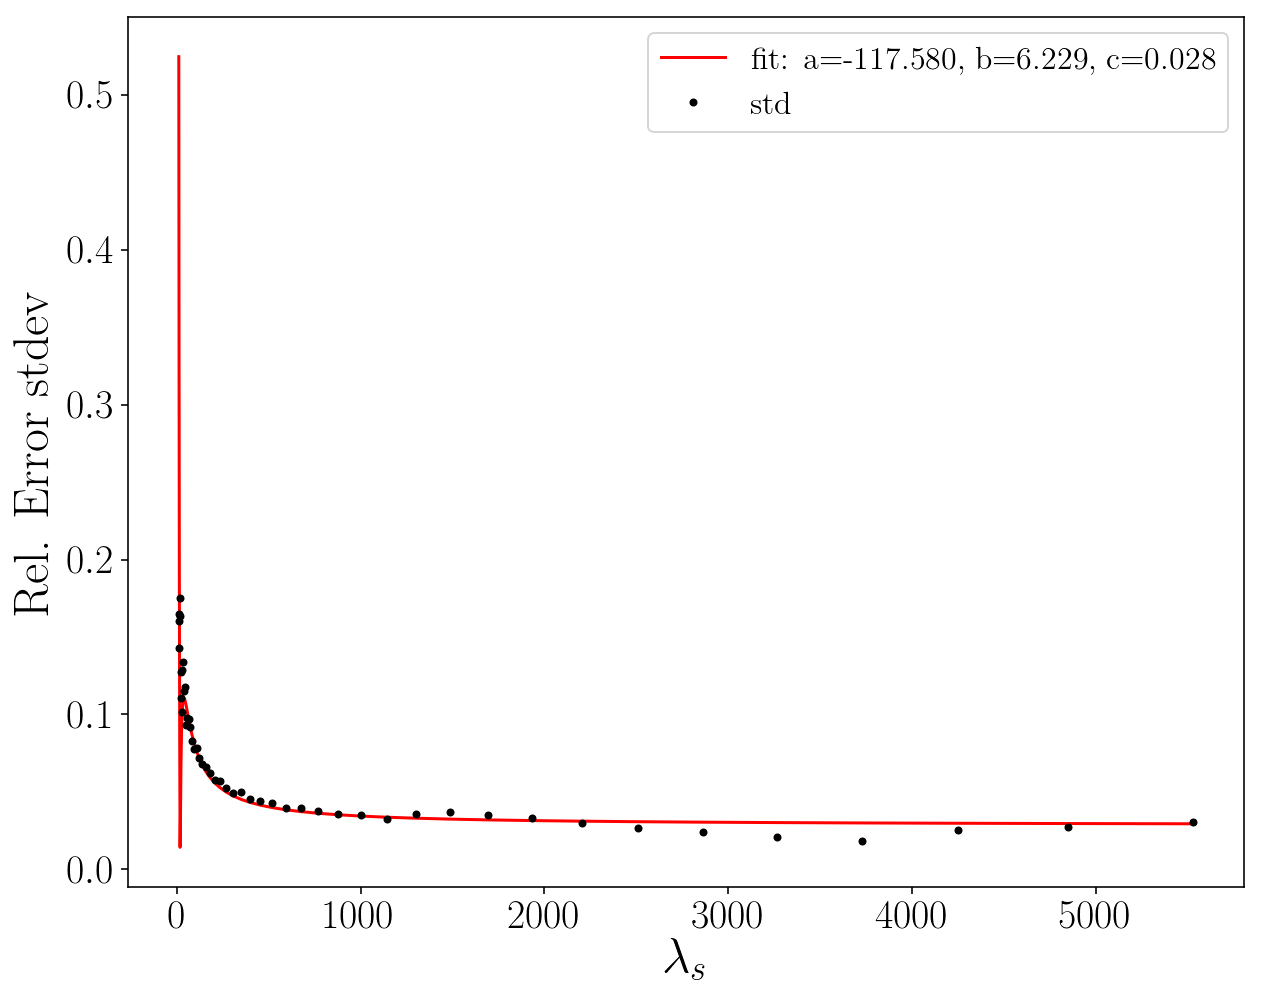

In [83]:
def FitFunc(x, a, b,c):
    return a/x/x+b/x+c
popt, pcov = curve_fit(FitFunc, lambdasbin[10:-1], Reslambdasbinstd[10:])
plt.plot(lambdasbin[:-1], np.fabs(FitFunc(lambdasbin[:-1], *popt)), 'r-',label='fit: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(popt))
plt.plot(lambdasbin[:-1], Reslambdasbinstd,'.',color='k',label='std')
plt.xlabel('$\lambda_s$')
plt.ylabel('Rel. Error stdev')
plt.legend()
plt.show()

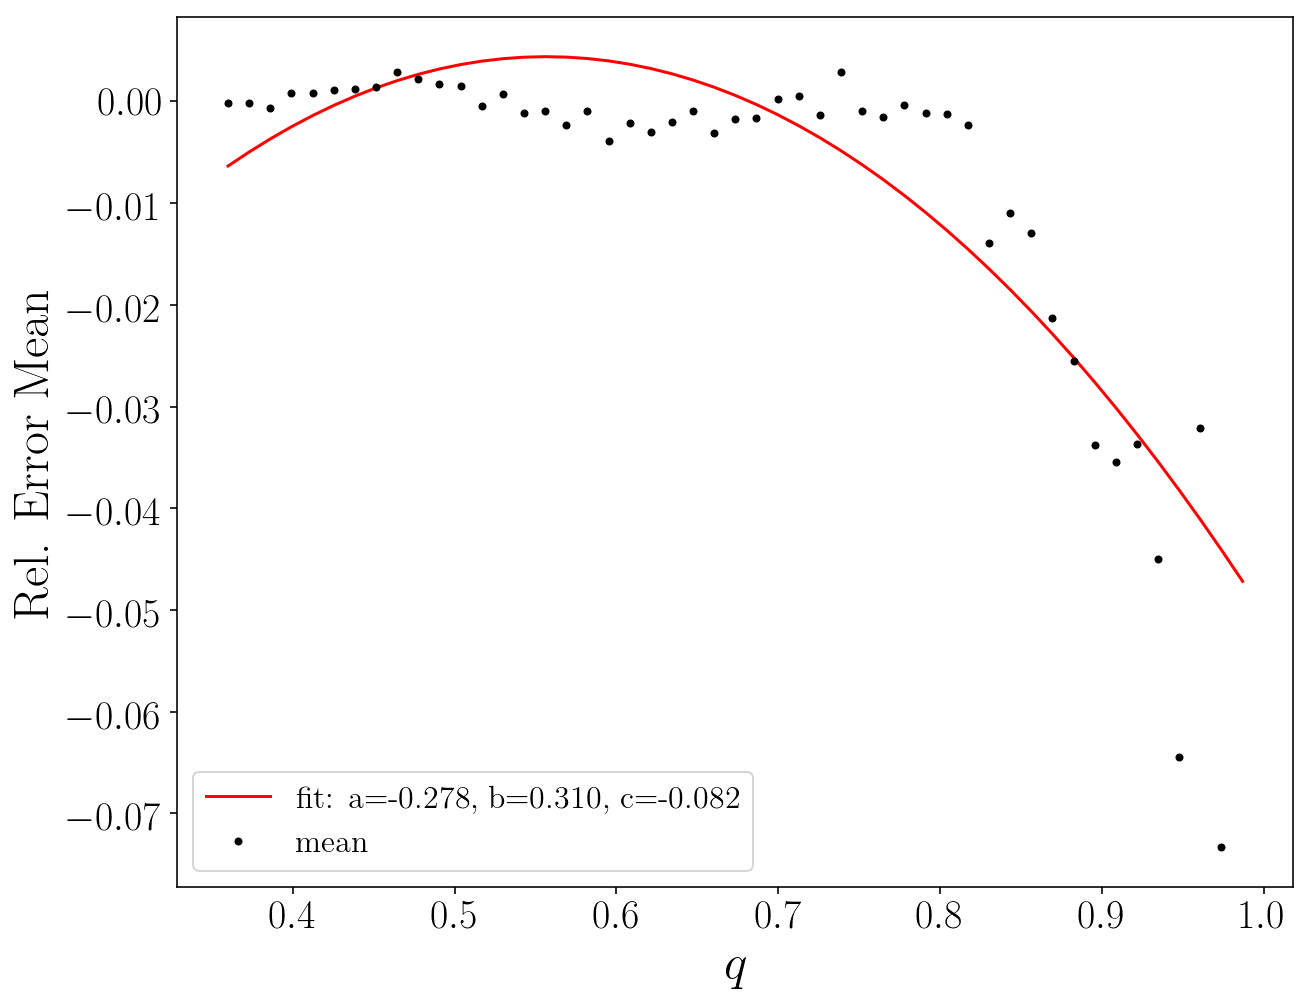

In [68]:
def FitFunc(x, a, b,c):
    return a*x*x+b*x+c
popt, pcov = curve_fit(FitFunc, qbin[:-3], Resqbinmean[:-2])
plt.plot(qbin[:-1], FitFunc(qbin[:-1], *popt), 'r-',label='fit: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(popt))
plt.plot(qbin[:-1], Resqbinmean,'.',color='k',label='mean')
plt.legend()
plt.xlabel('$q$')
plt.ylabel('Rel. Error Mean')
plt.show()

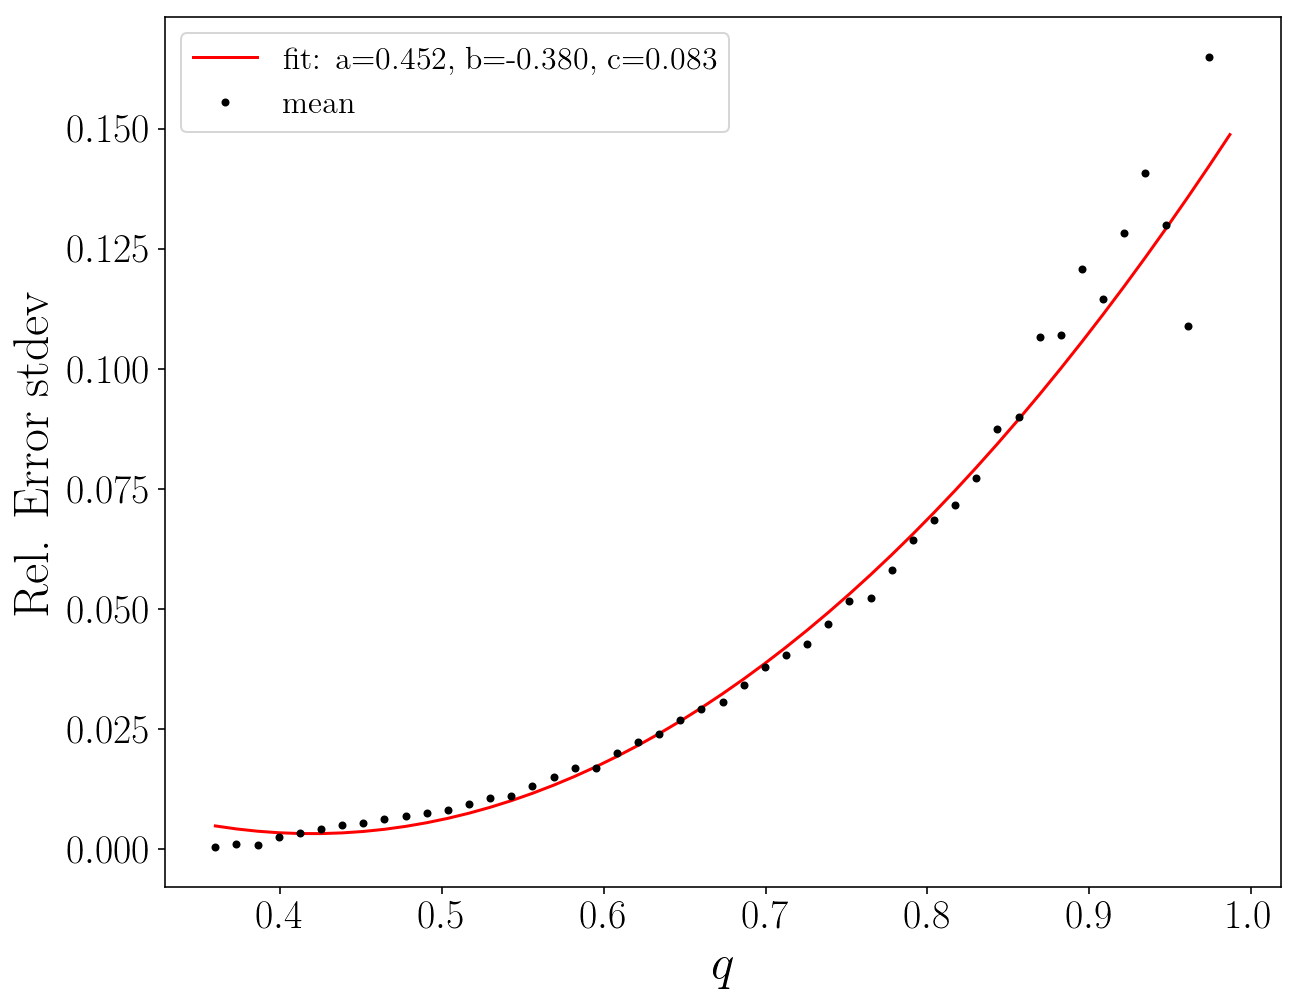

In [69]:
def FitFunc(x, a, b,c):
    return a*x*x+b*x+c
popt, pcov = curve_fit(FitFunc, qbin[:-10], Resqbinstd[:-9])
plt.plot(qbin[:-1], FitFunc(qbin[:-1], *popt), 'r-',label='fit: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(popt))
plt.plot(qbin[:-1], Resqbinstd,'.',color='k',label='mean')
plt.legend()
plt.xlabel('$q$')
plt.ylabel('Rel. Error stdev')
plt.show()

## Now with the absolute error

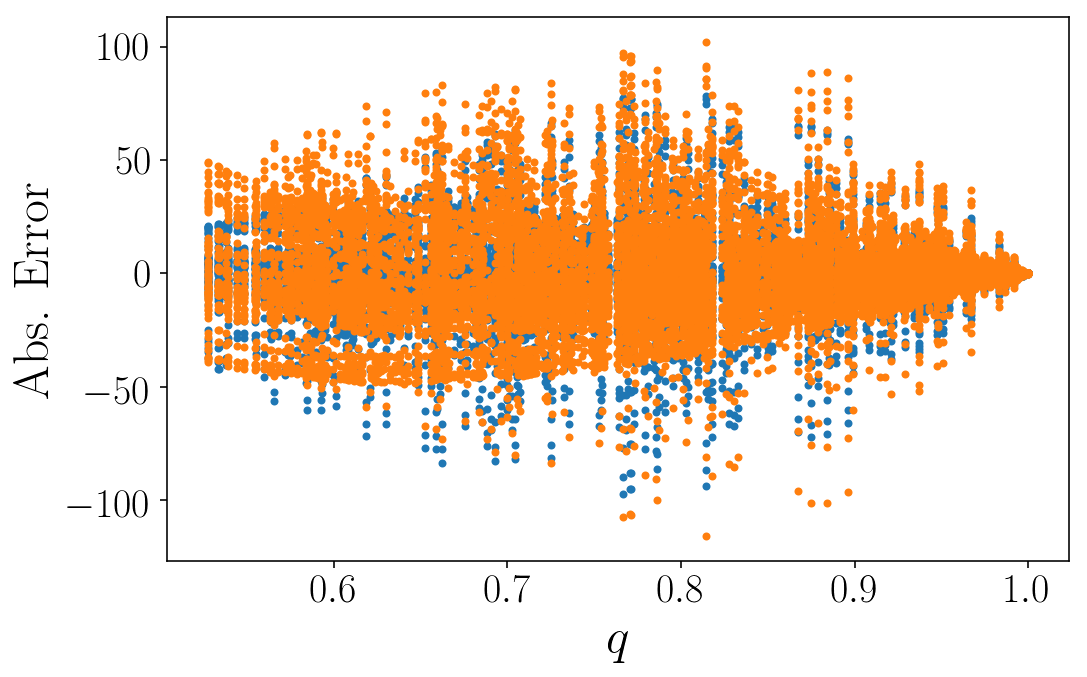

In [32]:
plt.plot(ResidualsC[:,0],ResidualsC[:,3],'.')
plt.plot(ResidualsUnC[:,0],ResidualsUnC[:,3],'.')
plt.xlabel('$q$')
plt.ylabel('Abs. Error')
plt.show()

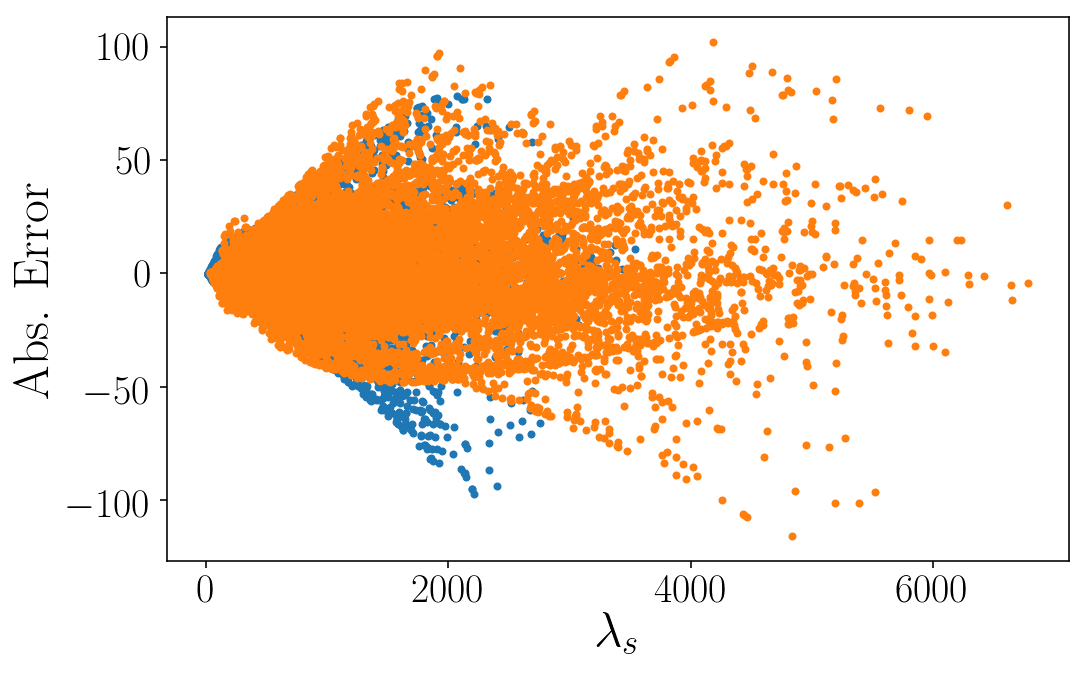

In [33]:
plt.plot(ResidualsC[:,1],ResidualsC[:,3],'.')
plt.plot(ResidualsUnC[:,1],ResidualsUnC[:,3],'.')
plt.xlabel('$\lambda_s$')
plt.ylabel('Abs. Error')
plt.show()

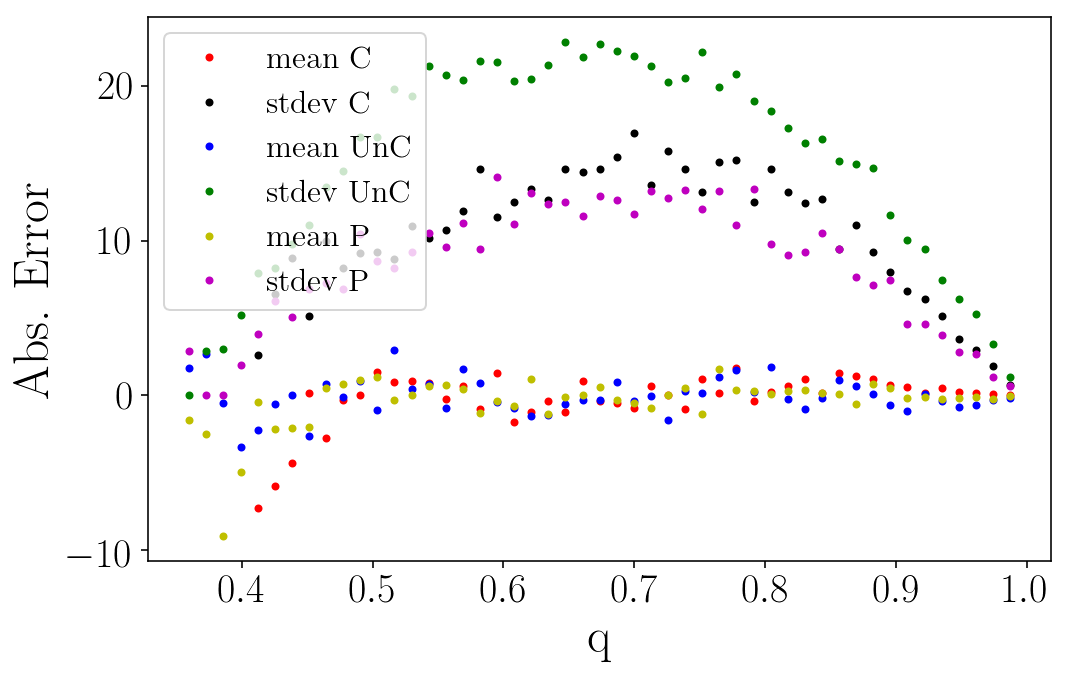

In [81]:
qbin=np.linspace(0.36,1,50)
Resqbin={}
Resqbinmean=[]
Resqbinstd=[]
for i in xrange(len(qbin)-1):
    Reslelt=ResidualsC[:,3][ResidualsC[:,0]>qbin[i]]
    qleft=ResidualsC[:,0][ResidualsC[:,0]>qbin[i]]
    Reslelt=Reslelt[qleft<qbin[i+1]]
    #Reslelt=Reslelt[np.fabs(Reslelt)<1]
    Resqbin[i]= Reslelt
    Resqbinmean.append(np.mean(Resqbin[i]))
    Resqbinstd.append(np.std(Resqbin[i]))
plt.plot(qbin[:-1], Resqbinmean,'.',color='r',label='mean C')
plt.plot(qbin[:-1], Resqbinstd,'.',color='k',label='stdev C')


Resqbin={}
Resqbinmean=[]
Resqbinstd=[]
for i in xrange(len(qbin)-1):
    Reslelt=ResidualsUnC[:,3][ResidualsUnC[:,0]>qbin[i]]
    qleft=ResidualsUnC[:,0][ResidualsUnC[:,0]>qbin[i]]
    Reslelt=Reslelt[qleft<qbin[i+1]]
    #Reslelt=Reslelt[np.fabs(Reslelt)<1]
    Resqbin[i]= Reslelt
    Resqbinmean.append(np.mean(Resqbin[i]))
    Resqbinstd.append(np.std(Resqbin[i]))
plt.plot(qbin[:-1], Resqbinmean,'.',color='b',label='mean UnC')
plt.plot(qbin[:-1], Resqbinstd,'.',color='g',label='stdev UnC')

Resqbin={}
Resqbinmean=[]
Resqbinstd=[]
for i in xrange(len(qbin)-1):
    Reslelt=ResidualsP[:,3][ResidualsP[:,0]>qbin[i]]
    qleft=ResidualsP[:,0][ResidualsP[:,0]>qbin[i]]
    Reslelt=Reslelt[qleft<qbin[i+1]]
    #Reslelt=Reslelt[np.fabs(Reslelt)<1]
    Resqbin[i]= Reslelt
    Resqbinmean.append(np.mean(Resqbin[i]))
    Resqbinstd.append(np.std(Resqbin[i]))
plt.plot(qbin[:-1], Resqbinmean,'.',color='y',label='mean P')
plt.plot(qbin[:-1], Resqbinstd,'.',color='m',label='stdev P')


plt.xlabel('q')
plt.ylabel('Abs. Error')
plt.legend()
plt.show()

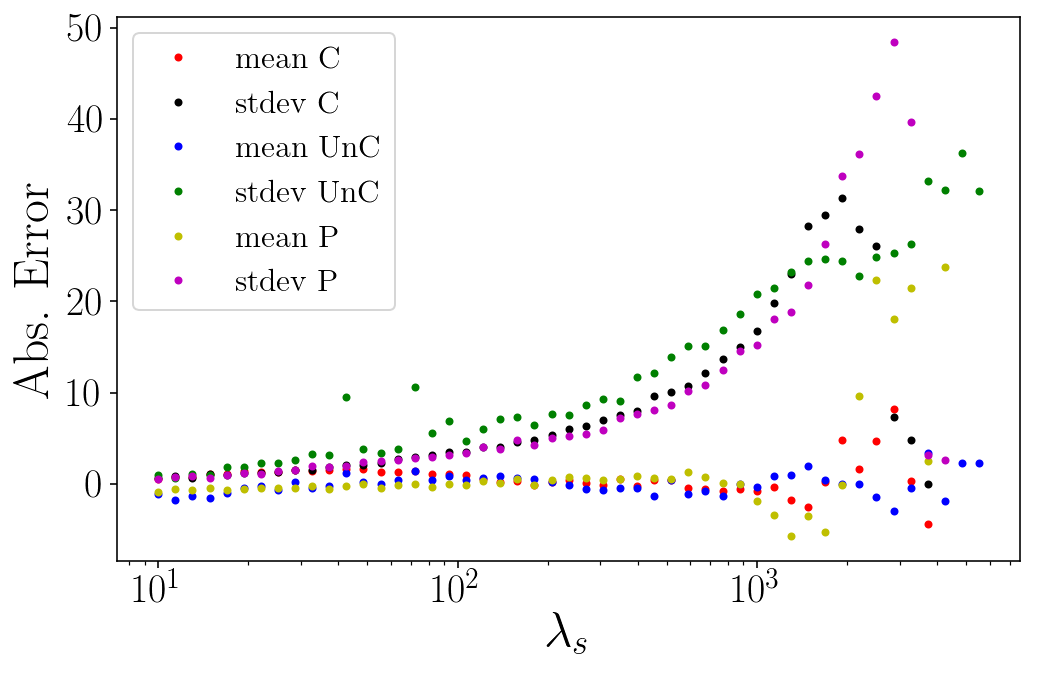

In [82]:
lambdasbin=np.logspace(1,3.8,50)
Reslambdasbin={}
Reslambdasbinmean=[]
Reslambdasbinstd=[]
for i in xrange(len(lambdasbin)-1):
    Reslelt=ResidualsC[:,3][ResidualsC[:,1]>lambdasbin[i]]
    lambdasleft=ResidualsC[:,1][ResidualsC[:,1]>lambdasbin[i]]
    Reslelt=Reslelt[lambdasleft<lambdasbin[i+1]]
    Reslambdasbin[i]= Reslelt
    Reslambdasbinmean.append(np.mean(Reslambdasbin[i]))
    Reslambdasbinstd.append(np.std(Reslambdasbin[i]))
plt.plot(lambdasbin[:-1], Reslambdasbinmean,'.',color='r',label='mean C')
plt.plot(lambdasbin[:-1], Reslambdasbinstd,'.',color='k',label='stdev C')

Reslambdasbin={}
Reslambdasbinmean=[]
Reslambdasbinstd=[]
for i in xrange(len(lambdasbin)-1):
    Reslelt=ResidualsUnC[:,3][ResidualsUnC[:,1]>lambdasbin[i]]
    lambdasleft=ResidualsUnC[:,1][ResidualsUnC[:,1]>lambdasbin[i]]
    Reslelt=Reslelt[lambdasleft<lambdasbin[i+1]]
    Reslambdasbin[i]= Reslelt
    Reslambdasbinmean.append(np.mean(Reslambdasbin[i]))
    Reslambdasbinstd.append(np.std(Reslambdasbin[i]))
plt.plot(lambdasbin[:-1], Reslambdasbinmean,'.',color='b',label='mean UnC')
plt.plot(lambdasbin[:-1], Reslambdasbinstd,'.',color='g',label='stdev UnC')


Reslambdasbin={}
Reslambdasbinmean=[]
Reslambdasbinstd=[]
for i in xrange(len(lambdasbin)-1):
    Reslelt=ResidualsP[:,3][ResidualsP[:,1]>lambdasbin[i]]
    lambdasleft=ResidualsP[:,1][ResidualsP[:,1]>lambdasbin[i]]
    Reslelt=Reslelt[lambdasleft<lambdasbin[i+1]]
    Reslambdasbin[i]= Reslelt
    Reslambdasbinmean.append(np.mean(Reslambdasbin[i]))
    Reslambdasbinstd.append(np.std(Reslambdasbin[i]))
plt.plot(lambdasbin[:-1], Reslambdasbinmean,'.',color='y',label='mean P')
plt.plot(lambdasbin[:-1], Reslambdasbinstd,'.',color='m',label='stdev P')

plt.xlabel('$\lambda_s$')
plt.ylabel('Abs. Error')
plt.xscale('log')
plt.legend()
plt.show()

In [14]:
from scipy.optimize import curve_fit

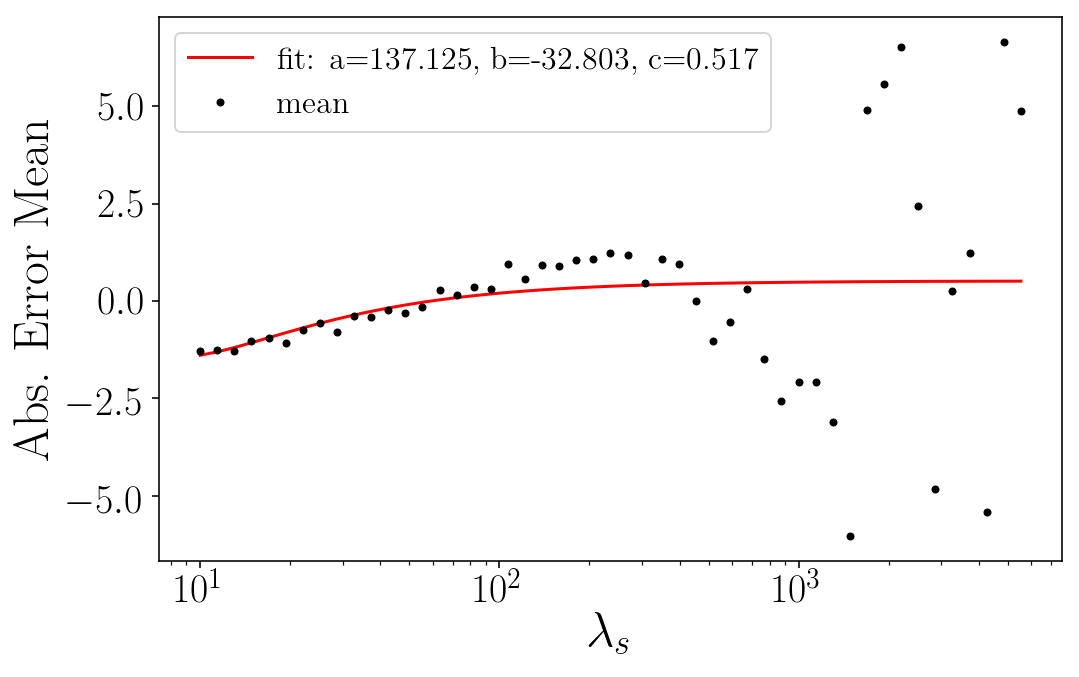

[ 137.12527389  -32.80266127    0.51686373]


In [16]:
def FitFunc(x, a, b,c):
    return a/x/x+b/x+c
popt, pcov = curve_fit(FitFunc, lambdasbin[:-1], Reslambdasbinmean[:])
plt.plot(lambdasbin[:-1], FitFunc(lambdasbin[:-1], *popt), 'r-',label='fit: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(popt))
plt.plot(lambdasbin[:-1], Reslambdasbinmean,'.',color='k',label='mean')
plt.legend()
plt.xlabel('$\lambda_s$')
plt.ylabel('Abs. Error Mean')
plt.xscale('log')
plt.show()

print popt

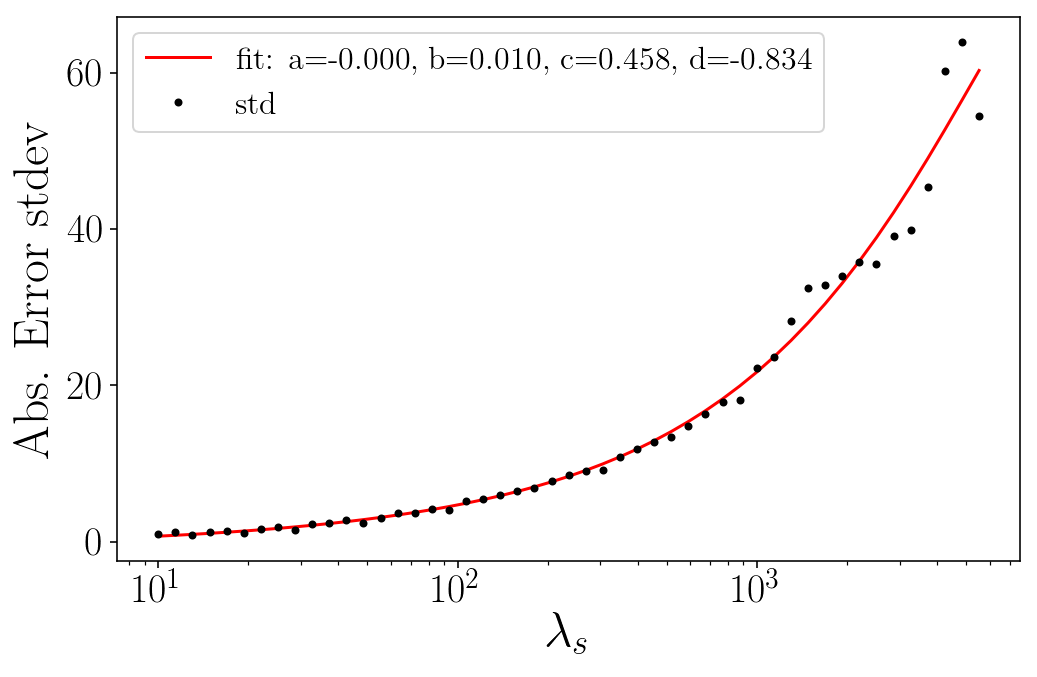

[ -7.38541865e-05   1.03777889e-02   4.58171653e-01  -8.34191255e-01]


In [41]:
def FitFunc(x, a, b,c,d):
    return a*x*np.sqrt(x)+b*x+c*np.sqrt(x)+d
popt, pcov = curve_fit(FitFunc, lambdasbin[:-1], Reslambdasbinstd[:])
plt.plot(lambdasbin[:-1], np.fabs(FitFunc(lambdasbin[:-1], *popt)), 'r-',label='fit: a=%5.3f, b=%5.3f, c=%5.3f, d=%5.3f' % tuple(popt))
plt.plot(lambdasbin[:-1], Reslambdasbinstd,'.',color='k',label='std')
plt.xlabel('$\lambda_s$')
#plt.xlim(0,300)
plt.ylabel('Abs. Error stdev')
plt.xscale('log')
plt.legend()
plt.show()

print popt

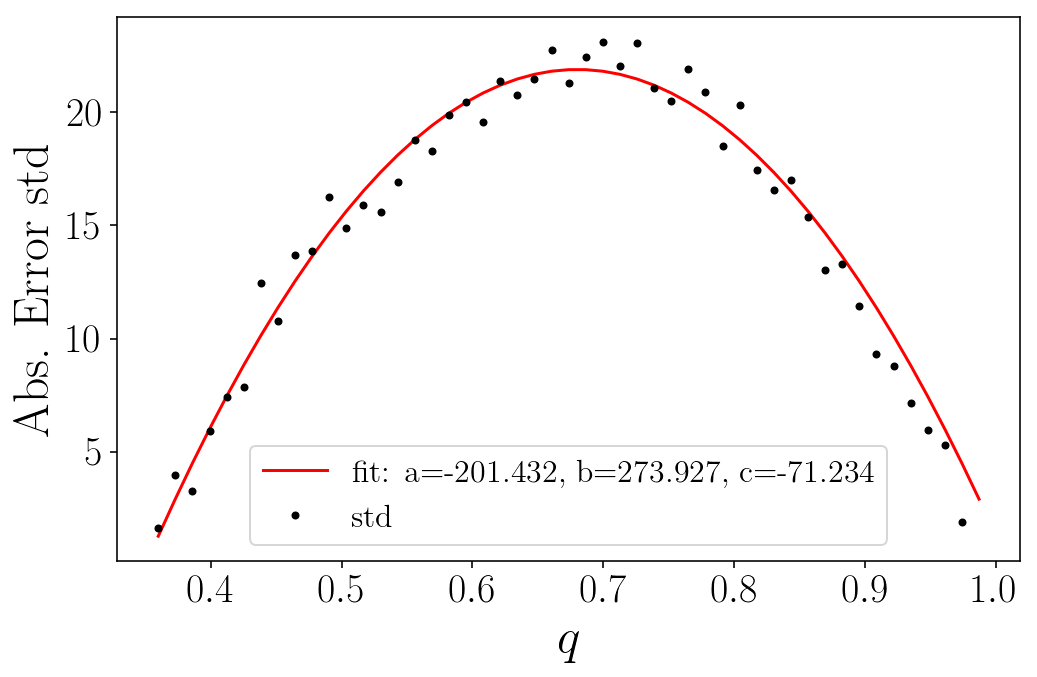

[-201.43239619  273.92682761  -71.23422462]


In [30]:
def FitFunc(x, a, b,c):
    return a*x*x+b*x+c
popt, pcov = curve_fit(FitFunc, qbin[:-10], Resqbinstd[:-9])
plt.plot(qbin[:-1], FitFunc(qbin[:-1], *popt), 'r-',label='fit: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(popt))
plt.plot(qbin[:-1], Resqbinstd,'.',color='k',label='std')
plt.legend()
plt.xlabel('$q$')
plt.ylabel('Abs. Error std')
plt.show()

print popt

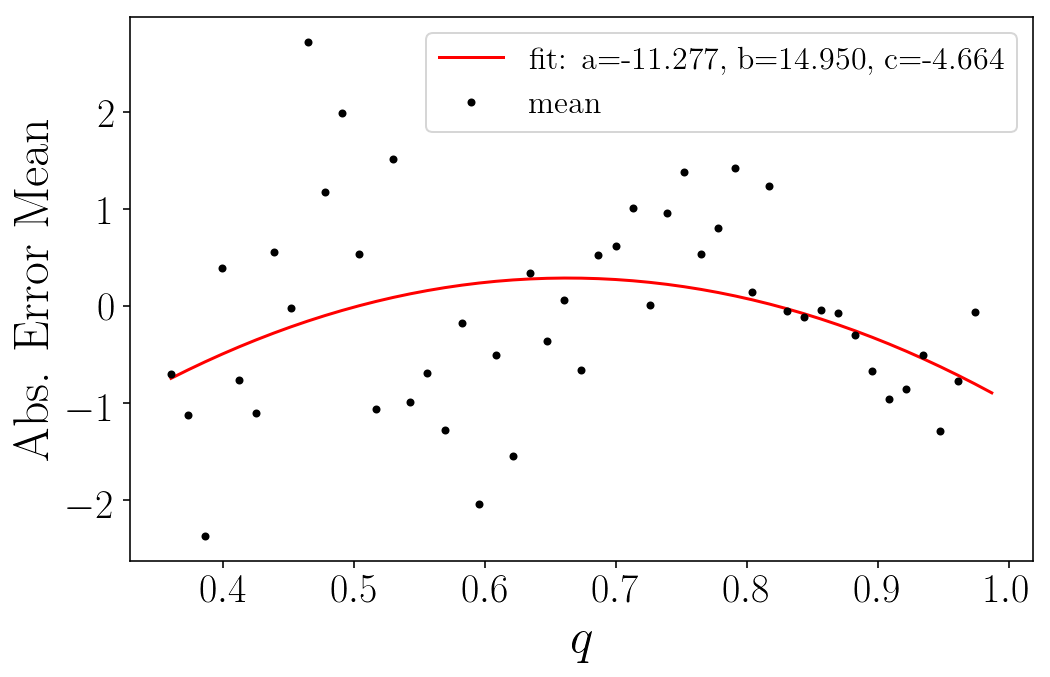

[-11.27652805  14.94995435  -4.66388505]


In [40]:
def FitFunc(x, a, b,c):
    return a*x*x+b*x+c
popt, pcov = curve_fit(FitFunc, qbin[:-3], Resqbinmean[:-2])
plt.plot(qbin[:-1], FitFunc(qbin[:-1], *popt), 'r-',label='fit: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(popt))
plt.plot(qbin[:-1], Resqbinmean,'.',color='k',label='mean')
#plt.axhline(np.mean(Resqbinmean[:-1]), label=str(np.mean(Resqbinmean[:-1])))
plt.legend()
plt.xlabel('$q$')
plt.ylabel('Abs. Error Mean')
plt.show()
print popt